<a href="https://colab.research.google.com/github/Farivini/Api_reconhecimento_de_digitos/blob/main/Treinamento_IA_digitos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# *Codigo de Classificação de digitos e exploração de dados*
### Vinicius farineli freire
#### Meu [Linkedin](https://)

In [ ]:


import matplotlib.pyplot as plt
from keras.datasets import mnist

Optei por importar keras que ja disponibiliza este datasets, para carregar a base de dados e fazer esse treinamento do modelo.

Declaramos variaveis de teste e para treino desse modelo
que no final vamos salvar.

Esse datasets ira retornar duas tuplas, para realizarmos os testes.

In [ ]:
(x_original, y_original),(x_teste, y_teste) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


*Agora analisamos as dimensões , para poder ver o tamanho e com o que estamos 
trabalhando*

In [ ]:
print("x_original", x_original.shape)

x_original (60000, 28, 28)


**Aqui conseguimos analisar que partimos de 60000 entradas 
com dimensionalidade de 28 por 28 pixel** 

Agora repetimos  para ver as outras variaveis.

In [ ]:
print("y_original", y_original.shape)
print("x_teste", x_teste.shape)
print("y_teste", y_teste.shape)

y_original (60000,)
x_teste (10000, 28, 28)
y_teste (10000,)


**Aqui ja conseguimos ter uma dimensão da quantidade para treino**

*10000 para fazer esse 'treino' da maquina.*

Pesquisei um pouco para fazer a normalização ou padronizar o modelo , e optei por fazer essa otimização baseada em gradiente.

[Verificar esse link sobre gradiente em numpy](http://pageperso.lif.univ-mrs.fr/~francois.denis/IAAM1/numpy-html-1.14.0/reference/generated/numpy.gradient.html)

In [ ]:
# Pego apenas 10% podendo ser mais ou menos e logo em seguida sim faço a parte do treino 

x_validacao, x_treino = x_original[:6000] / 255.0, x_original[6000:] / 255.0
y_validacao, y_treino = y_original[:6000], y_original[6000:]

In [ ]:
import numpy as np


In [ ]:
# Padronizar e criar a classificação
class_names = ['Zero','Um', 'Dois', 'Três', 'Quatro', 'Cinco', 'Seis', 'Sete', 'Oito', 'Nove']

In [ ]:
# Primeiro ele retorna um array indicando os indices dos 10 primeiras imagens do datasets
# Classe ela identifica pra mim, e retorna qual classe ela pertence


y_validacao[:10]


array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [ ]:
y_treino[:10]

array([6, 0, 1, 1, 5, 2, 8, 3, 0, 4], dtype=uint8)

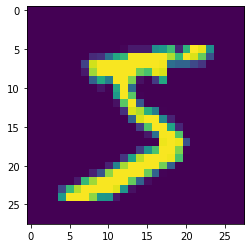

In [ ]:
plt.imshow(x_original[0])

Nesse momento existe a possibilidade de treinar este modelo assim, Porem não alcançaria um score ou uma acertatividade boa.

**Fui Pesquisar como melhorar essas imagens, então encontrei as funções cmap e interpolation. Interpolation você encontra nesse [Link](https://docs.scipy.org/doc/scipy/reference/tutorial/interpolate.html)**


**E Cmap neste aqui [Link](https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html)** 

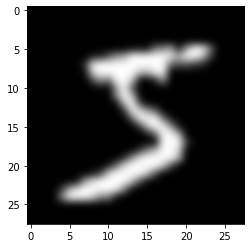

In [ ]:
plt.imshow(x_original[0], cmap='gray', interpolation='bicubic');

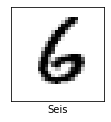

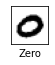

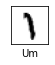

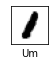

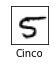

In [ ]:
# Podemos analisar e ver mais imagens como exemplo
plt.figure(figsize=(10,10))

for i in range (5):
  # subplot informa quantas linhas e quantas colunas e qual vou querer acessar
  plt.subplot(5, 3, i+1) 
  
  #trabalhar eixos        
  plt.xticks([])
  plt.yticks([])

  #sem grid
  plt.grid(False) 
  plt.imshow(x_treino[i], cmap=plt.cm.binary)
  plt.xlabel(class_names[y_treino[i]])
  plt.show()


Optei por criar um modelo simples do tipo Hidden Layer

In [ ]:
from tensorflow import keras
import tensorflow as tf

modelo = keras.models.Sequential()
modelo.add(keras.layers.Flatten())
modelo.add(tf.keras.layers.Dense(units=128, activation=tf.nn.relu))
modelo.add(tf.keras.layers.Dense(units=128, activation=tf.nn.relu))
modelo.add(tf.keras.layers.Dense(units=10, activation=tf.nn.softmax))

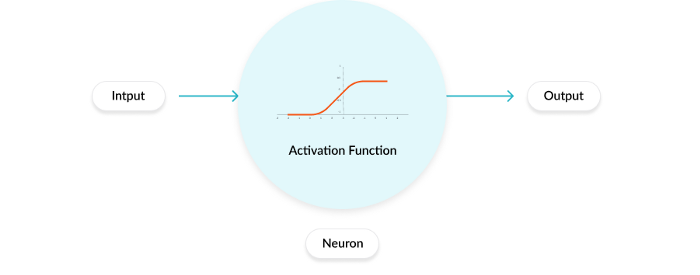

**Fui atrás de uma ativação para o modelo que decidi que deveria ser squencial por ser mais simples**
 
*A imagem acima explica as duas funções usadas Relu e Softmax*

In [ ]:
#Nessa secção conseguimos ver a descrição da variavel modelo 
modelo.summary()

 Breve explicação sobre o resumo apresentado


1.   Layer representa as camadas envolvidas
2.   Dense seria as camadas de filtragem propiamente ditas.



In [ ]:
""" 
Aqui podemos ver aonde estão alocadas, antes não dava muito importancia para estrutura de dados 
Mas aqui podemos ate salvar em alguma variavel pra um reutilização.

Ele retorna uma tupla com indices
"""

modelo.layers
#Por exemplo atribuindo uma camada a uma variavel
camada_primeira = modelo.layers[1]

In [ ]:
# Podemos agora compilar nosso modelo que ja segue um padrão
#modelo.compile(optimizer='sgd', loss = 'sparse_categorical_crossentropy', metrics='accuracy')
modelo.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
#Da mesma forma que tem no sckitilearn possui o modo fit
#modelo.fit(x_treino, y_treino, epochs=3, validation_data=(x_validacao, y_validacao))
modelo.fit(x_treino, y_treino, epochs=3)

Epoch 1/3
1688/1688 [==============================] - 3s 2ms/step - loss: 0.2385 - accuracy: 0.9291
Epoch 2/3
1688/1688 [==============================] - 3s 2ms/step - loss: 0.1031 - accuracy: 0.9679
Epoch 3/3
1688/1688 [==============================] - 3s 2ms/step - loss: 0.0695 - accuracy: 0.9783


##Obviamente podemos melhorar o valor da 'accuracy' acertividade
atribuindo mais neuronios ou camadas para fazer o pre processamento.

Pra avaliar melhor como a rede está se saindo podemos atribuir o processamento 
a uma variavel.

In [ ]:
historico_treino = modelo.fit(x_treino, y_treino, epochs=10, validation_data=(x_validacao, y_validacao))

Epoch 1/10
1688/1688 [==============================] - 3s 2ms/step - loss: 0.3292 - accuracy: 0.9053 - val_loss: 0.3063 - val_accuracy: 0.9133
Epoch 2/10
1688/1688 [==============================] - 3s 2ms/step - loss: 0.3238 - accuracy: 0.9073 - val_loss: 0.3047 - val_accuracy: 0.9113
Epoch 3/10
1688/1688 [==============================] - 3s 2ms/step - loss: 0.3195 - accuracy: 0.9089 - val_loss: 0.2977 - val_accuracy: 0.9162
Epoch 4/10
1688/1688 [==============================] - 3s 2ms/step - loss: 0.3153 - accuracy: 0.9090 - val_loss: 0.2963 - val_accuracy: 0.9172
Epoch 5/10
1688/1688 [==============================] - 3s 2ms/step - loss: 0.3117 - accuracy: 0.9109 - val_loss: 0.2924 - val_accuracy: 0.9165
Epoch 6/10
1688/1688 [==============================] - 3s 2ms/step - loss: 0.3084 - accuracy: 0.9116 - val_loss: 0.2910 - val_accuracy: 0.9205
Epoch 7/10
1688/1688 [==============================] - 3s 2ms/step - loss: 0.3056 - accuracy: 0.9120 - val_loss: 0.2902 - val_accuracy:

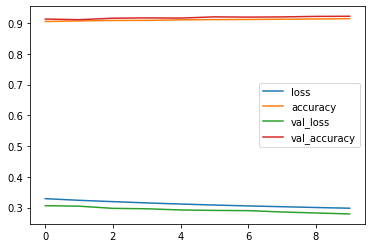

In [ ]:
import pandas as pd


pd.DataFrame(historico_treino.history).plot()
plt.show()

###Basicamente o grafico mostra o que o Epoch nos mostra em numeros 

#Posso melhorar minha visualização pra ver aonde meu modelo pode estar confundindo e consequentemente tratar

In [ ]:
modelo.compile(optimizer='adam', loss = 'sparse_categorical_crossentropy', metrics='accuracy')
historico_melhorado = modelo.fit(x_treino, y_treino, epochs=20, validation_split=0.25)

Epoch 1/20
1266/1266 [==============================] - 3s 3ms/step - loss: 0.0016 - accuracy: 0.9996 - val_loss: 0.0507 - val_accuracy: 0.9896
Epoch 2/20
1266/1266 [==============================] - 3s 2ms/step - loss: 0.0025 - accuracy: 0.9992 - val_loss: 0.0697 - val_accuracy: 0.9860
Epoch 3/20
1266/1266 [==============================] - 3s 2ms/step - loss: 0.0017 - accuracy: 0.9997 - val_loss: 0.0533 - val_accuracy: 0.9898
Epoch 4/20
1266/1266 [==============================] - 3s 3ms/step - loss: 3.3241e-04 - accuracy: 1.0000 - val_loss: 0.0521 - val_accuracy: 0.9903
Epoch 5/20
1266/1266 [==============================] - 3s 3ms/step - loss: 1.0450e-04 - accuracy: 1.0000 - val_loss: 0.0525 - val_accuracy: 0.9902
Epoch 6/20
1266/1266 [==============================] - 3s 3ms/step - loss: 6.3849e-05 - accuracy: 1.0000 - val_loss: 0.0534 - val_accuracy: 0.9905
Epoch 7/20
1266/1266 [==============================] - 3s 3ms/step - loss: 0.0021 - accuracy: 0.9994 - val_loss: 0.0891 - v

In [ ]:
modelo.fit(x_treino, y_treino, epochs=20, validation_split=0.25)

Epoch 1/20
1266/1266 [==============================] - 3s 3ms/step - loss: 8.6510e-06 - accuracy: 1.0000 - val_loss: 0.0597 - val_accuracy: 0.9904
Epoch 2/20
1266/1266 [==============================] - 3s 2ms/step - loss: 0.0032 - accuracy: 0.9990 - val_loss: 0.0820 - val_accuracy: 0.9844
Epoch 3/20
1266/1266 [==============================] - 3s 2ms/step - loss: 7.5985e-04 - accuracy: 0.9999 - val_loss: 0.0643 - val_accuracy: 0.9889
Epoch 4/20
1266/1266 [==============================] - 3s 2ms/step - loss: 3.8362e-05 - accuracy: 1.0000 - val_loss: 0.0631 - val_accuracy: 0.9890
Epoch 5/20
1266/1266 [==============================] - 3s 2ms/step - loss: 2.1739e-05 - accuracy: 1.0000 - val_loss: 0.0632 - val_accuracy: 0.9893
Epoch 6/20
1266/1266 [==============================] - 3s 3ms/step - loss: 1.4831e-05 - accuracy: 1.0000 - val_loss: 0.0628 - val_accuracy: 0.9892
Epoch 7/20
1266/1266 [==============================] - 3s 3ms/step - loss: 1.0471e-05 - accuracy: 1.0000 - val_loss

#Pra uma acertividade que precisa ser precisa e minimo detalhe pra erros otimizar o processamento e a maneira correta. Podemos pensar em uma rede que faz a predição para detectar cancer ou para algo bancario ,nao há margem para erros.

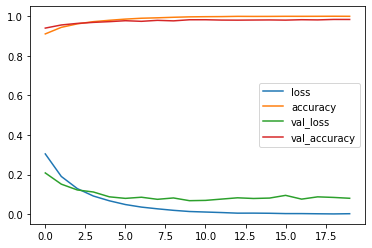

In [ ]:
pd.DataFrame(historico_melhorado.history).plot()
plt.show()

Agora salvamos esse modelo treinado

> Link sobre a como salvar esse modelo - [Aqui](https://keras.io/api/models/model_saving_apis/)



In [ ]:
from keras.models import load_model

Aqui vemos quanto o modelo é preciso.

In [ ]:
modelo.evaluate(x_teste, y_teste)

313/313 [==============================] - 1s 2ms/step - loss: 16.9490 - accuracy: 0.9720


[16.949026107788086, 0.972000002861023]

##Abaixo vamos salvar o modelo e carrega-lo para pode usar

In [ ]:
modelo.save_weights('modelo1_treinado.h5')

In [ ]:
modelo.load_weights('modelo1_treinado.h5')

##Vamos importar as bibliotecas opencv = cv2
[Saiba mais](https://opencv.org/)

##Em seguida a blibioteca os que gerencia as files
[Saiba mais](https://docs.python.org/pt-br/3/library/os.html)

In [ ]:
import cv2
import os

5  com confiança de  98.86%


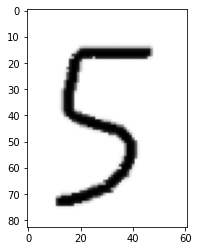

In [ ]:
img_pred = cv2.imread("cinco.png", 0)
plt.imshow(img_pred, cmap='gray')

if img_pred.shape != [28,28]:
    img2 = cv2.resize(img_pred, (28, 28))
    img_pred = img2.reshape(28, 28, -1)
else:
    img_pred = img_pred.reshape(28, 28, -1)


img_pred = img_pred.reshape(1, 1, 28, 28).astype('float32')

img_pred = img_pred/255.0



pred = modelo.predict_classes(img_pred)
pred_proba = modelo.predict_proba(img_pred)
pred_proba = "%.2f%%" % (pred_proba[0][pred]*100)
print(pred[0], " com confiança de ", pred_proba)